In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import folium
from folium.plugins import HeatMap
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder, StandardScaler

%matplotlib inline

In [3]:
df = pd.read_csv('metadata.csv')
df

,Recording_ID,Genus,Specific_epithet,Subspecies,English_name,Recordist,Country,Locality,Latitude,Longitude,...,Other_species23,Other_species24,Other_species25,Other_species26,Other_species27,Other_species28,Other_species29,Other_species30,Species,Path
0,356824,Sonus,naturalis,NaN,Soundscape,José Carlos Sires,Spain,"doñana visitable, sevilla, andalucía",37.1058,-6.2577,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sonus naturalis,mp3//Sonus-naturalis-356824.mp3
1,317951,Sonus,naturalis,NaN,Soundscape,José Carlos Sires,Spain,"arroyo algarbe, hinojos, huelva, andalucía",37.3006,-6.3783,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sonus naturalis,mp3//Sonus-naturalis-317951.mp3
2,508571,Sonus,naturalis,NaN,Soundscape,Nelson Conceição,Portugal,"Santo Estêvão, Tavira, Faro",37.1554,-7.6960,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sonus naturalis,mp3//Sonus-naturalis-508571.mp3
3,448534,Sonus,naturalis,NaN,Soundscape,José Carlos Sires,Spain,"Córdoba, Córdoba, Andalucía",37.9321,-4.9446,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sonus naturalis,mp3//Sonus-naturalis-448534.mp3
4,373414,Sonus,naturalis,NaN,Soundscape,Lars Lachmann,Germany,"Frohnau, Berlin, north-eastern part",52.6408,13.2956,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sonus naturalis,mp3//Sonus-naturalis-373414.mp3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2145,518681,Glaucidium,passerinum,NaN,Eurasian Pygmy Owl,Daniele Baroni,Finland,"Nousis, Åbo, Southwest Finland",60.6657,22.2822,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Glaucidium passerinum,mp3//Glaucidium-passerinum-518681.mp3
2146,401901,Glaucidium,passerinum,passerinum,Eurasian Pygmy Owl,Jarek Matusiak,Russian Federation,"Gmina Dubeninki, Nesterovsky District, Kalinin...",54.3490,22.6561,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Glaucidium passerinum,mp3//Glaucidium-passerinum-401901.mp3
2147,201176,Glaucidium,passerinum,passerinum,Eurasian Pygmy Owl,Bram Piot,France,"Haut-Jura, Farges, Ain",46.1716,5.8689,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Glaucidium passerinum,mp3//Glaucidium-passerinum-201176.mp3
2148,408254,Glaucidium,passerinum,NaN,Eurasian Pygmy Owl,Miklos Heincz,Hungary,"Velem, Kőszegi, Vas County",47.3411,16.4901,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Glaucidium passerinum,mp3//Glaucidium-passerinum-408254.mp3


In [4]:
"""
Cell generated by Data Wrangler.
"""
def clean_data(df):
    # Drop column: 'Path'
    df = df.drop(columns=['Path'])
    # Drop column: 'Other_species30'
    df = df.drop(columns=['Other_species30'])
    # Drop column: 'Other_species28'
    df = df.drop(columns=['Other_species28'])
    # Drop column: 'Other_species29'
    df = df.drop(columns=['Other_species29'])
    # Drop column: 'Other_species27'
    df = df.drop(columns=['Other_species27'])
    # Drop column: 'Other_species26'
    df = df.drop(columns=['Other_species26'])
    # Drop column: 'Other_species25'
    df = df.drop(columns=['Other_species25'])
    # Drop column: 'Other_species24'
    df = df.drop(columns=['Other_species24'])
    # Drop column: 'Other_species23'
    df = df.drop(columns=['Other_species23'])
    # Drop column: 'Remarks'
    df = df.drop(columns=['Remarks'])
    # Drop column: 'Spectrogram_full'
    df = df.drop(columns=['Spectrogram_full'])
    # Drop column: 'Spectrogram_large'
    df = df.drop(columns=['Spectrogram_large'])
    # Drop column: 'Spectrogram_med'
    df = df.drop(columns=['Spectrogram_med'])
    # Drop column: 'Spectrogram_small'
    df = df.drop(columns=['Spectrogram_small'])
    # Drop column: 'file.name'
    df = df.drop(columns=['file.name'])
    # Convert Date column to datetime format
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    # Replace all instances of "?" with "" in column: 'Altitude'
    df['Altitude'] = df['Altitude'].replace(to_replace='?', value=np.nan)
    # Replace all instances of "" with "" in column: 'Time'
    df['Time'] = df['Time'].replace(to_replace='?', value=np.nan)
    # Ensure 'Altitude' and are numeric, coerce errors to NaN
    df['Altitude'] = pd.to_numeric(df['Altitude'], errors='coerce')
    # Drop rows with missing data in column: 'Date'
    df = df.dropna(subset=['Date','Altitude'])
    # Drop column: 'Url'
    df = df.drop(columns=['Url'])
    # Drop column: 'License'
    df = df.drop(columns=['License'])
    # Drop column: 'Audio_file'
    df = df.drop(columns=['Audio_file'])
    # Capitalize the first character in column: 'Locality'
    df['Locality'] = df['Locality'].str.title()
    return df

df_clean = clean_data(df.copy())
df = df_clean
df

,Recording_ID,Genus,Specific_epithet,Subspecies,English_name,Recordist,Country,Locality,Latitude,Longitude,...,Other_species14,Other_species15,Other_species16,Other_species17,Other_species18,Other_species19,Other_species20,Other_species21,Other_species22,Species
2,508571,Sonus,naturalis,NaN,Soundscape,Nelson Conceição,Portugal,"Santo Estêvão, Tavira, Faro",37.1554,-7.6960,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sonus naturalis
3,448534,Sonus,naturalis,NaN,Soundscape,José Carlos Sires,Spain,"Córdoba, Córdoba, Andalucía",37.9321,-4.9446,...,Dendrocopos major,Aegithalos caudatus,Cyanistes caeruleus,Lophophanes cristatus,Garrulus glandarius,Sylvia melanocephala,NaN,NaN,NaN,Sonus naturalis
4,373414,Sonus,naturalis,NaN,Soundscape,Lars Lachmann,Germany,"Frohnau, Berlin, North-Eastern Part",52.6408,13.2956,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sonus naturalis
8,442463,Sonus,naturalis,NaN,Soundscape,José Carlos Sires,Spain,"Córdoba, Córdoba, Andalucía",37.9407,-4.8940,...,Garrulus glandarius,Coccothraustes coccothraustes,Spinus spinus,Certhia brachydactyla,Aegithalos caudatus,NaN,NaN,NaN,NaN,Sonus naturalis
10,447407,Sonus,naturalis,NaN,Soundscape,José Carlos Sires,Spain,"Córdoba, Córdoba, Andalucía",37.9413,-4.8958,...,Certhia brachydactyla,Regulus ignicapilla,Aegithalos caudatus,Columba palumbus,Troglodytes troglodytes,NaN,NaN,NaN,NaN,Sonus naturalis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2145,518681,Glaucidium,passerinum,NaN,Eurasian Pygmy Owl,Daniele Baroni,Finland,"Nousis, Åbo, Southwest Finland",60.6657,22.2822,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Glaucidium passerinum
2146,401901,Glaucidium,passerinum,passerinum,Eurasian Pygmy Owl,Jarek Matusiak,Russian Federation,"Gmina Dubeninki, Nesterovsky District, Kalinin...",54.3490,22.6561,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Glaucidium passerinum
2147,201176,Glaucidium,passerinum,passerinum,Eurasian Pygmy Owl,Bram Piot,France,"Haut-Jura, Farges, Ain",46.1716,5.8689,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Glaucidium passerinum
2148,408254,Glaucidium,passerinum,NaN,Eurasian Pygmy Owl,Miklos Heincz,Hungary,"Velem, Kőszegi, Vas County",47.3411,16.4901,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Glaucidium passerinum


In [5]:
df.columns.values

# Convert Length from "minutes:seconds" format to total seconds
def convert_to_seconds(length):
    try:
        minutes, seconds = map(int, length.split(':'))
        return minutes * 60 + seconds
    except ValueError:
        return np.nan  # Handle invalid formats as NaN
    
df['Length_seconds'] = df['Length'].apply(convert_to_seconds)

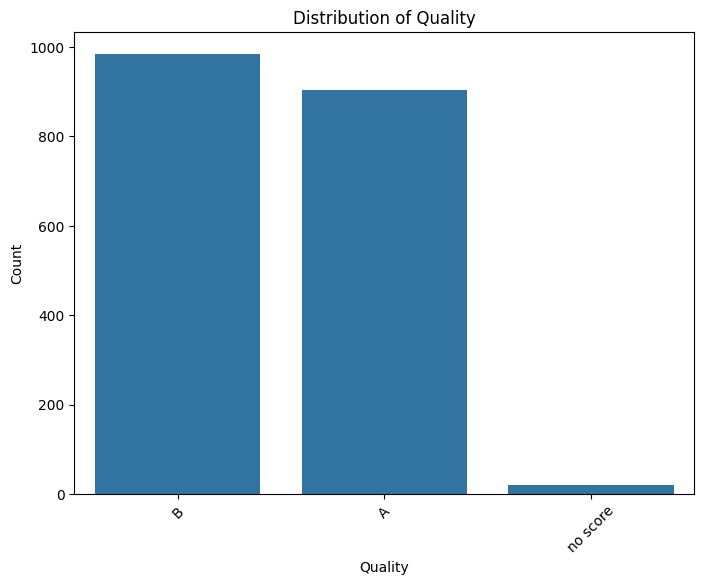

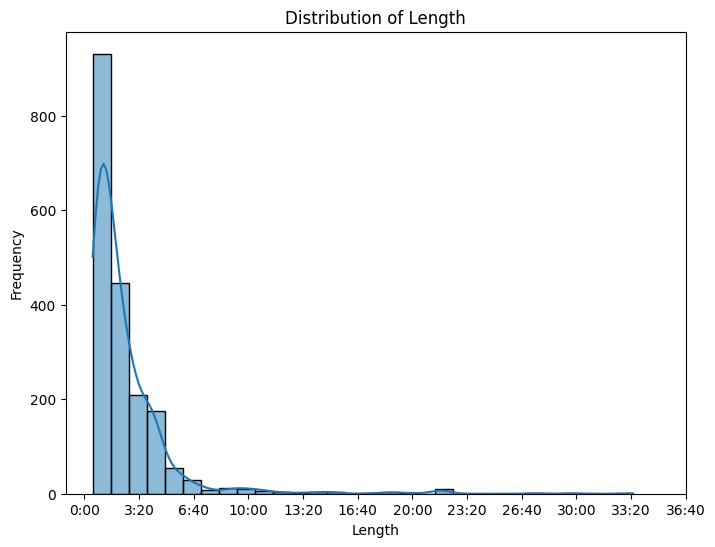

In [6]:
# Distribution of Quality
plt.figure(figsize=(8, 6))
sns.countplot(x='Quality', data=df, order=df['Quality'].value_counts().index)
plt.title('Distribution of Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Distribution of Length
plt.figure(figsize=(8, 6))
sns.histplot(df['Length_seconds'], bins=30, kde=True)
plt.title('Distribution of Length')
plt.xlabel('Length')
plt.ylabel('Frequency')
max_length = int(df['Length_seconds'].max())
step = max(10, (max_length // 10))  # Ensure at least 10-second intervals
plt.xticks(ticks=range(0, max_length + step, step), labels=[f"{t//60}:{t%60:02d}" for t in range(0, max_length + step, step)])
plt.show()


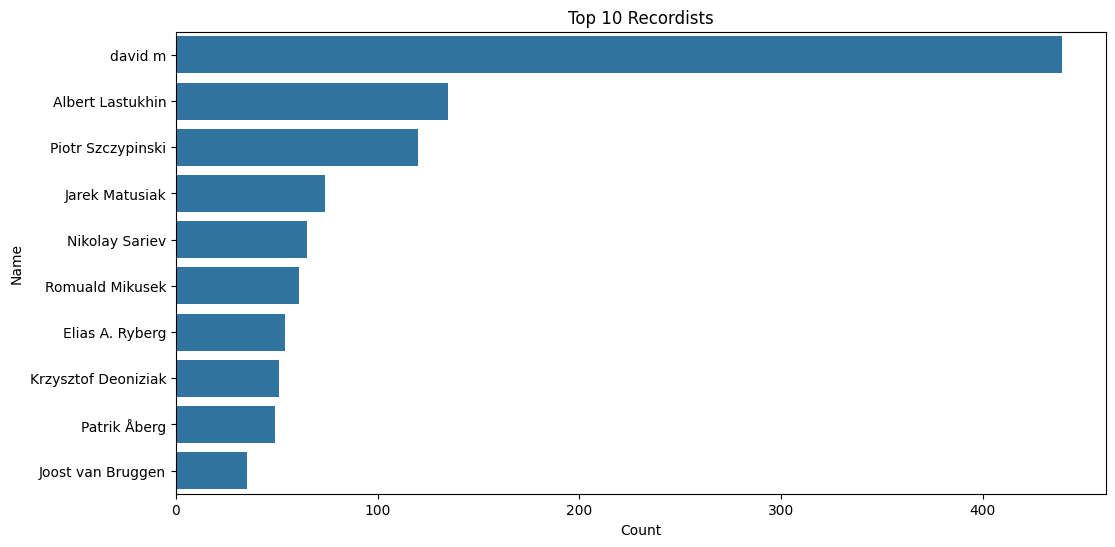

In [7]:
# Top 10 Recordists
plt.figure(figsize=(12, 6))
sns.countplot(y='Recordist', data=df, order=df['Recordist'].value_counts().nlargest(10).index)
plt.title('Top 10 Recordists')
plt.xlabel('Count')
plt.ylabel('Name')
plt.show()

In [8]:
# Geographic distribution of bird calls
fig = px.scatter_geo(df, lat='Latitude', lon='Longitude', 
                     hover_name='English_name', 
                     title='Geographic Distribution of Bird Calls')
fig.update_geos(projection_type="natural earth")
fig.show()

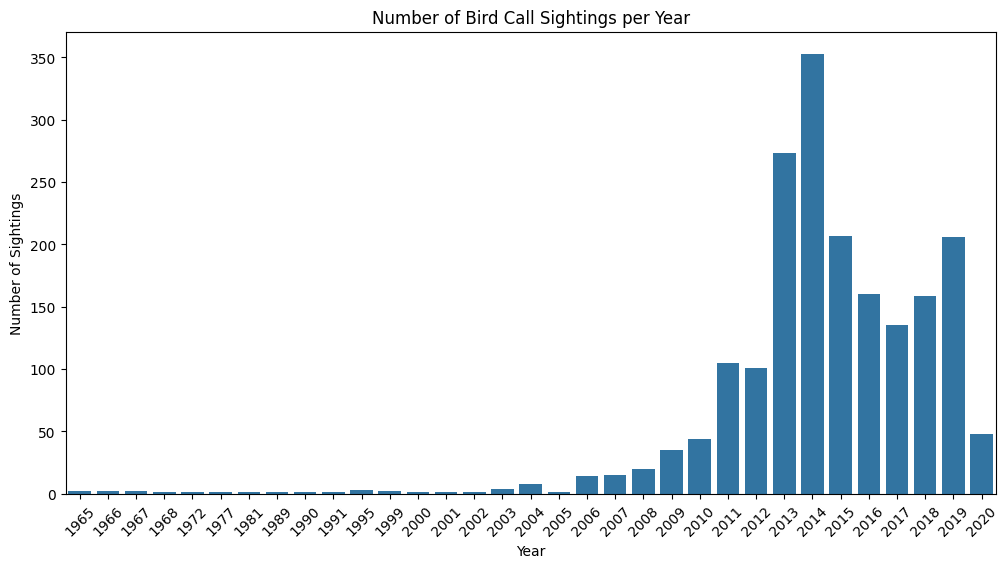

In [9]:
# Extract year and month
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

plt.figure(figsize=(12,6))
sns.countplot(x='Year', data=df)
plt.title('Number of Bird Call Sightings per Year')
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.ylabel('Number of Sightings')
plt.show()


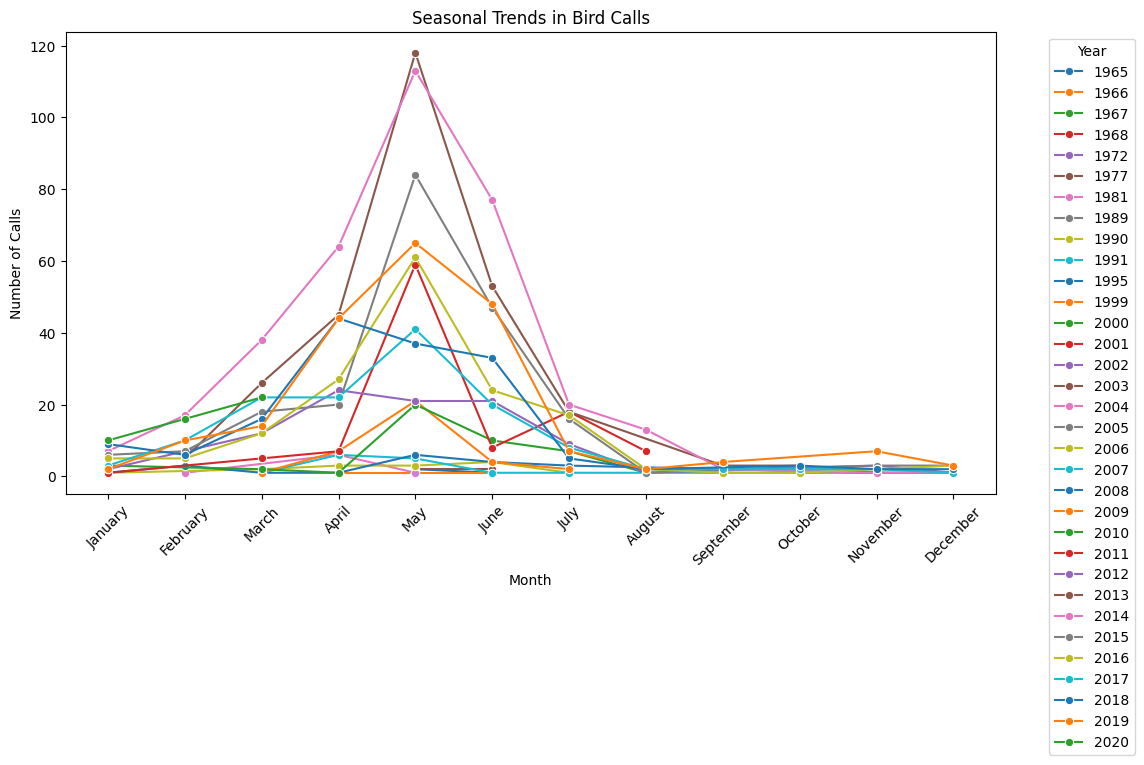

In [10]:
# Seasonal trends in bird calls
seasonal_trend = df.groupby(['Year', 'Month']).size().reset_index(name='Call_Count')
plt.figure(figsize=(12, 6))
month_names = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
sns.lineplot(x='Month', y='Call_Count', hue='Year', data=seasonal_trend, marker='o', palette='tab10')
plt.title('Seasonal Trends in Bird Calls')
plt.xlabel('Month')
plt.ylabel('Number of Calls')
plt.xticks(ticks=range(1, 13), labels=month_names, rotation=45)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [11]:
# Species Diversity
unique_species = df['Species'].nunique()
unique_subspecies = df['Subspecies'].nunique()
print(f"Number of unique species: {unique_species}")
print(f"Number of unique subspecies: {unique_subspecies}")

Number of unique species: 50
Number of unique subspecies: 60


C:\Users\Grzegorz\AppData\Local\Temp\ipykernel_29024\2058765573.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




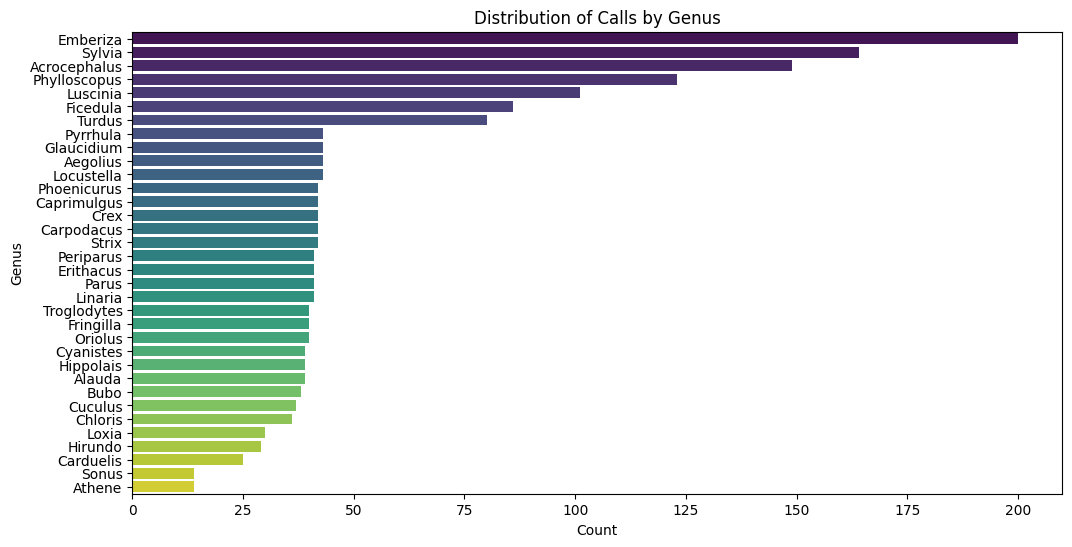

In [12]:
# Distribution of calls by genus
plt.figure(figsize=(12, 6))
sns.countplot(y='Genus', data=df, order=df['Genus'].value_counts().index, palette='viridis')
plt.title('Distribution of Calls by Genus')
plt.xlabel('Count')
plt.ylabel('Genus')
plt.show()

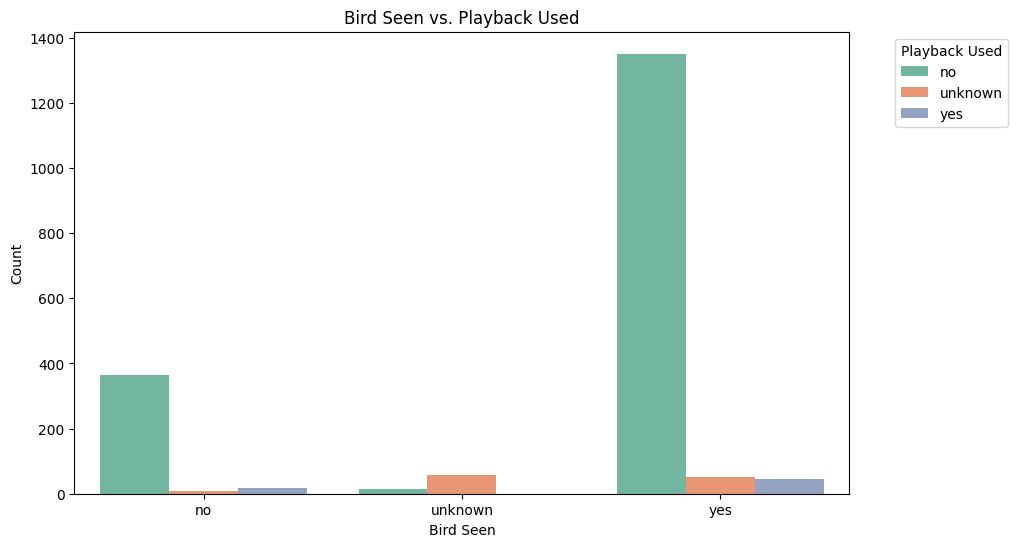

In [13]:
# Bird Behavior Analysis: Bird_seen vs Playback_used
behavior_data = df.groupby(['Bird_seen', 'Playback_used']).size().reset_index(name='Counts')
plt.figure(figsize=(10, 6))
sns.barplot(x='Bird_seen', y='Counts', hue='Playback_used', data=behavior_data, palette='Set2')
plt.title('Bird Seen vs. Playback Used')
plt.xlabel('Bird Seen')
plt.ylabel('Count')
plt.legend(title='Playback Used', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.show()

C:\Users\Grzegorz\AppData\Local\Temp\ipykernel_29024\3742034633.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




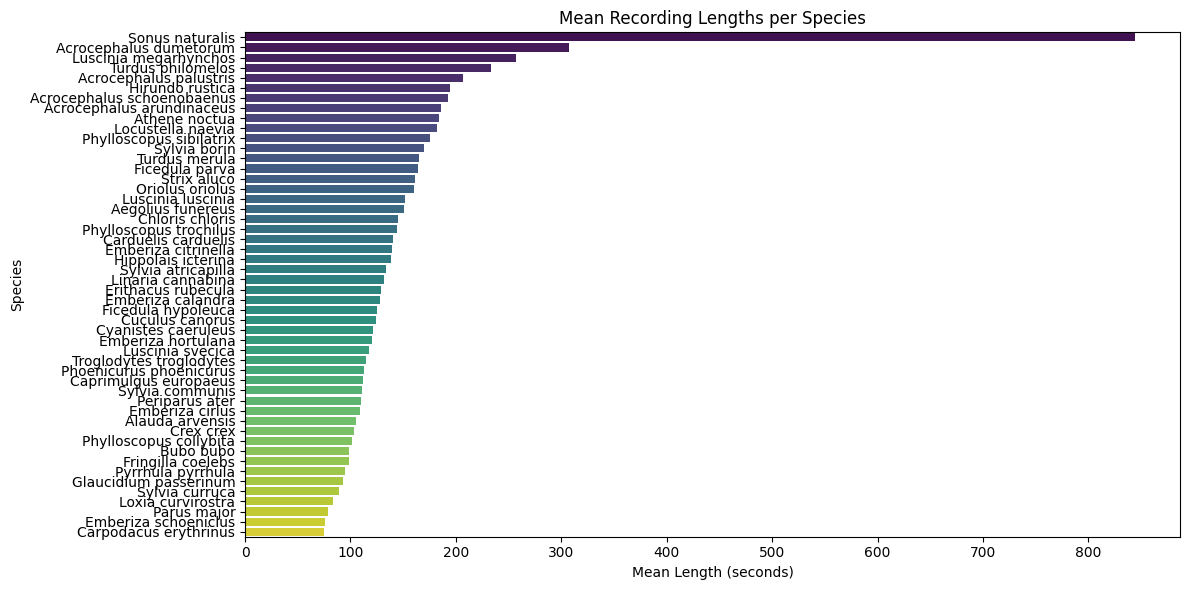

In [14]:
# Calculate mean recording length per species
mean_length_species = df.groupby('Species')['Length_seconds'].mean().reset_index()
mean_length_species = mean_length_species.sort_values(by='Length_seconds', ascending=False)

# Plot mean recording lengths per species
plt.figure(figsize=(12, 6))
sns.barplot(x='Length_seconds', y='Species', data=mean_length_species, palette='viridis')
plt.title('Mean Recording Lengths per Species')
plt.xlabel('Mean Length (seconds)')
plt.ylabel('Species')
plt.tight_layout()
plt.show()

In [15]:
import os
file_path = 'heatmap.html'
# Heatmap of bird call recordings using Latitude and Longitude
heatmap_data = df[['Latitude', 'Longitude']].dropna()
# Check if the file already exists
if not os.path.exists(file_path):
    map_center = [heatmap_data['Latitude'].mean(), heatmap_data['Longitude'].mean()]
    heatmap_map = folium.Map(location=map_center, zoom_start=6)
    HeatMap(heatmap_data.values.tolist(), radius=8).add_to(heatmap_map)
    heatmap_map.save(file_path)  # Save to an HTML file
    print(f"'{file_path}' has been created.")
else:
    print(f"'{file_path}' already exists.")



'heatmap.html' already exists.


C:\Users\Grzegorz\AppData\Local\Temp\ipykernel_29024\1015884949.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




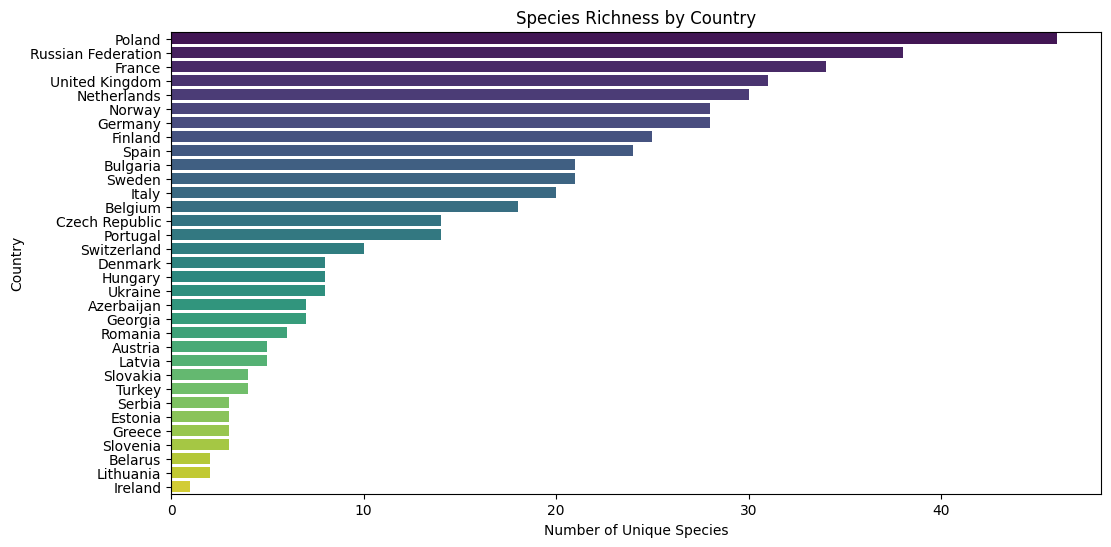

In [16]:
# Species count by country
species_count = df.groupby('Country')['Species'].nunique().reset_index()
species_count = species_count.sort_values(by='Species', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x='Species', y='Country', data=species_count, palette='viridis')
plt.title('Species Richness by Country')
plt.xlabel('Number of Unique Species')
plt.ylabel('Country')
plt.show()


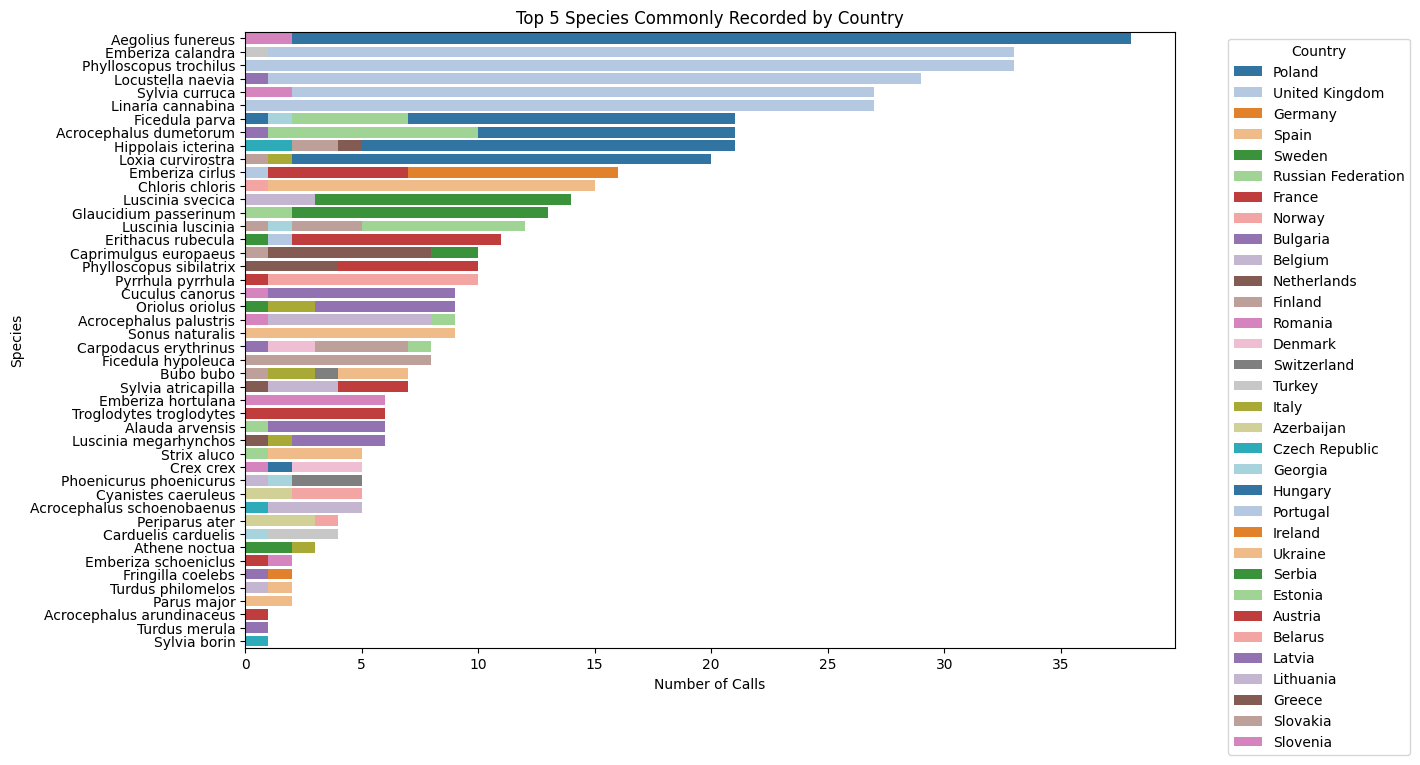

In [17]:
# Species commonly recorded in specific countries
species_country = df.groupby(['Country', 'Species']).size().reset_index(name='Counts')
common_species = species_country.sort_values(by='Counts', ascending=False).groupby('Country').head(5)
plt.figure(figsize=(12, 8))
sns.barplot(x='Counts', y='Species', hue='Country', data=common_species, dodge=False, palette='tab20')
plt.title('Top 5 Species Commonly Recorded by Country')
plt.xlabel('Number of Calls')
plt.ylabel('Species')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

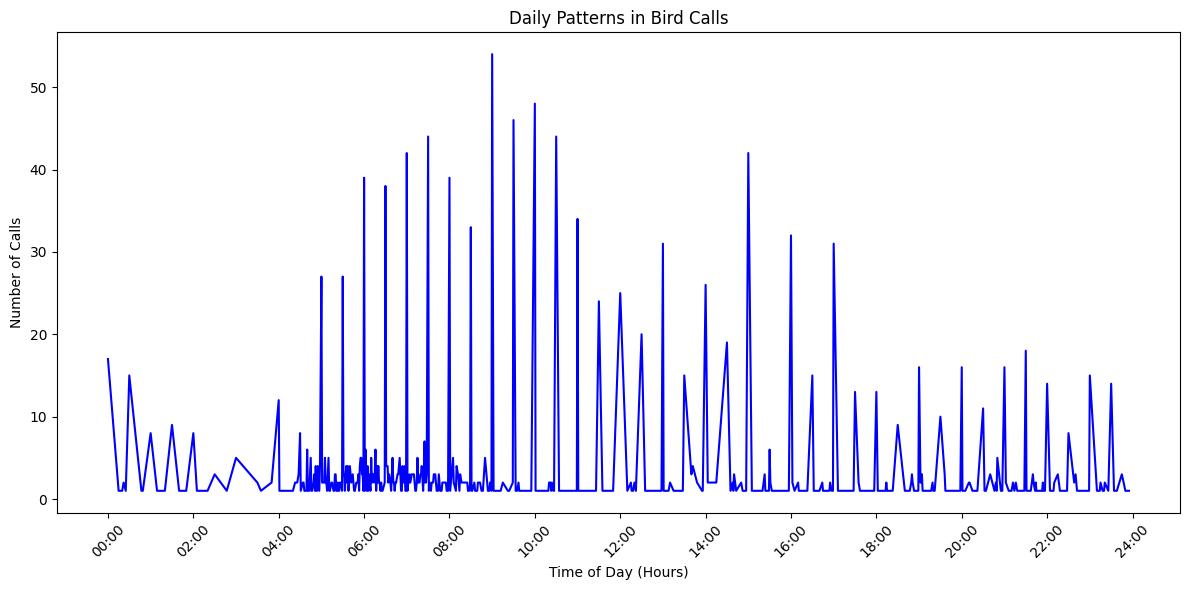

In [18]:

df['Time'] = df['Time'].astype(str)

def convert_time_to_minutes(time_str):
    try:
        if ':' in time_str:
            hours, minutes = map(int, time_str.split(':'))
            return hours * 60 + minutes
        else:
            return np.nan  # Return NaN if the format is not as expected
    except (ValueError, AttributeError):
        return np.nan

df['Time_minutes'] = df['Time'].apply(convert_time_to_minutes)

# Line chart showing daily patterns
plt.figure(figsize=(12, 6))
daily_pattern = df.groupby('Time_minutes').size().reset_index(name='Call_Count')
sns.lineplot(x='Time_minutes', y='Call_Count', data=daily_pattern, color='blue')
plt.title('Daily Patterns in Bird Calls')
plt.xlabel('Time of Day (Hours)')
plt.ylabel('Number of Calls')
plt.xticks(
    ticks=range(0, 1441, 120),
    labels=[f"{t//60:02d}:{t%60:02d}" for t in range(0, 1441, 120)],
    rotation=45
)
plt.tight_layout()
plt.show()



C:\Users\Grzegorz\AppData\Local\Temp\ipykernel_29024\1007695553.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




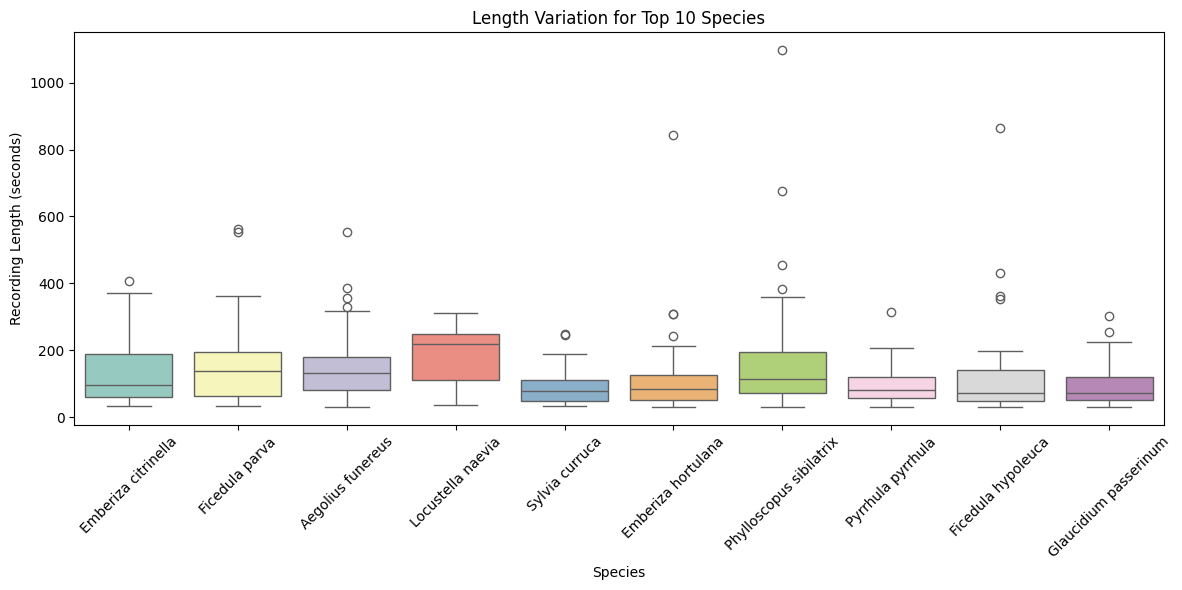

In [19]:
# Top 10 species by number of recordings
top_species = df['Species'].value_counts().head(10).index
top_species_data = df[df['Species'].isin(top_species)]

# Boxplot for length variation
plt.figure(figsize=(12, 6))
sns.boxplot(x='Species', y='Length_seconds', data=top_species_data, palette='Set3')
plt.title('Length Variation for Top 10 Species')
plt.xlabel('Species')
plt.ylabel('Recording Length (seconds)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


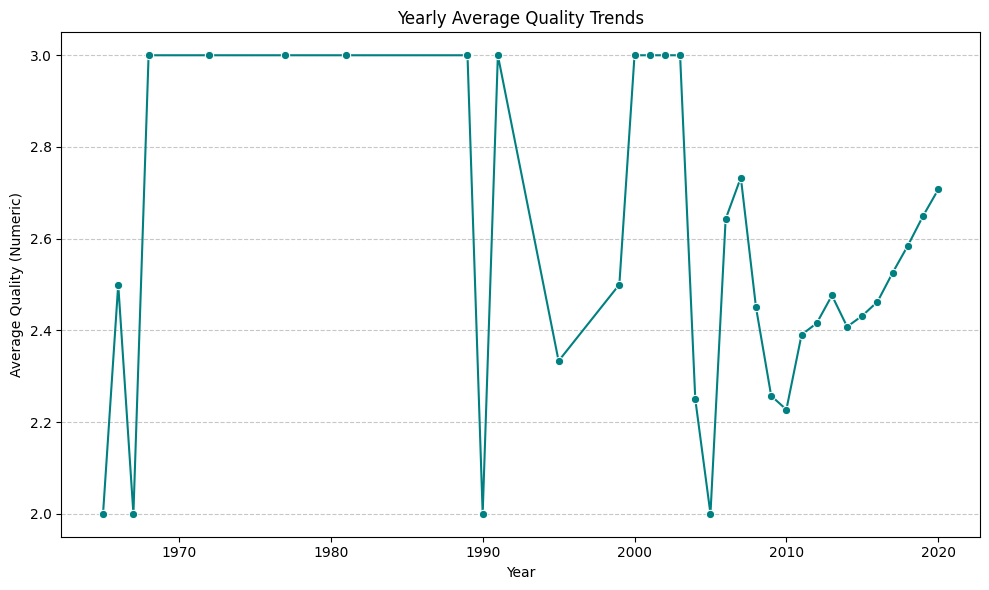

In [20]:
# Map Quality to numeric values using .loc
quality_mapping = {'A': 3, 'B': 2, 'No Score': 1}
df.loc[:, 'Quality_numeric'] = df['Quality'].map(quality_mapping)
df = df.dropna(subset=['Quality_numeric'])
quality_trend_yearly = df.groupby('Year')['Quality_numeric'].mean().reset_index()

# Line chart for yearly quality trends
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Quality_numeric', data=quality_trend_yearly, marker='o', color='teal')
plt.title('Yearly Average Quality Trends')
plt.xlabel('Year')
plt.ylabel('Average Quality (Numeric)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

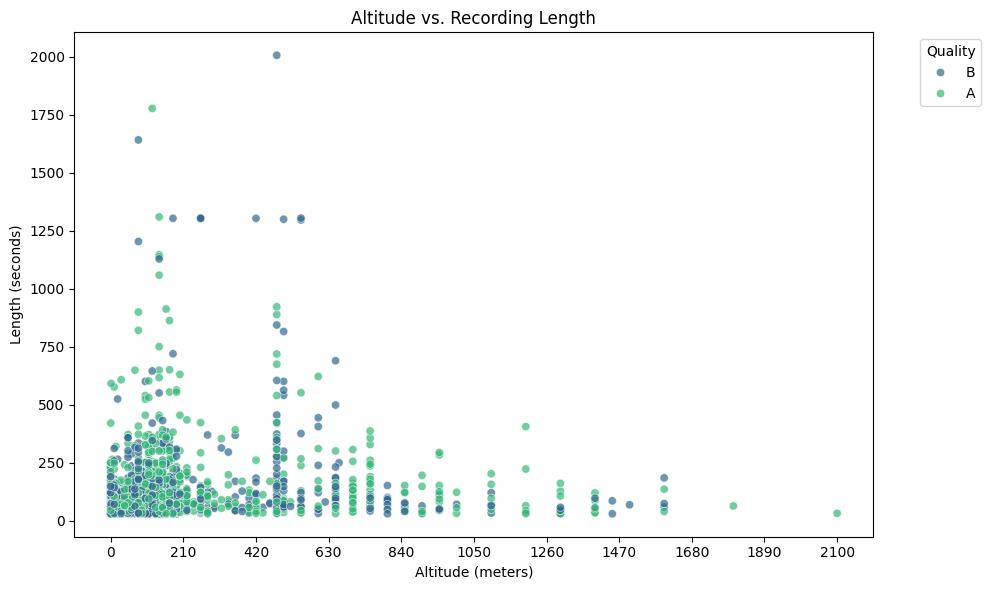

In [21]:
# Scatter plot for Altitude vs. Length
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Altitude', y='Length_seconds', data=df, hue='Quality', palette='viridis', alpha=0.7)
plt.title('Altitude vs. Recording Length')
plt.xlabel('Altitude (meters)')
plt.ylabel('Length (seconds)')
plt.xticks(range(int(df['Altitude'].min()), int(df['Altitude'].max())+1, int((df['Altitude'].max() - df['Altitude'].min()) / 10)))
plt.legend(title='Quality', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

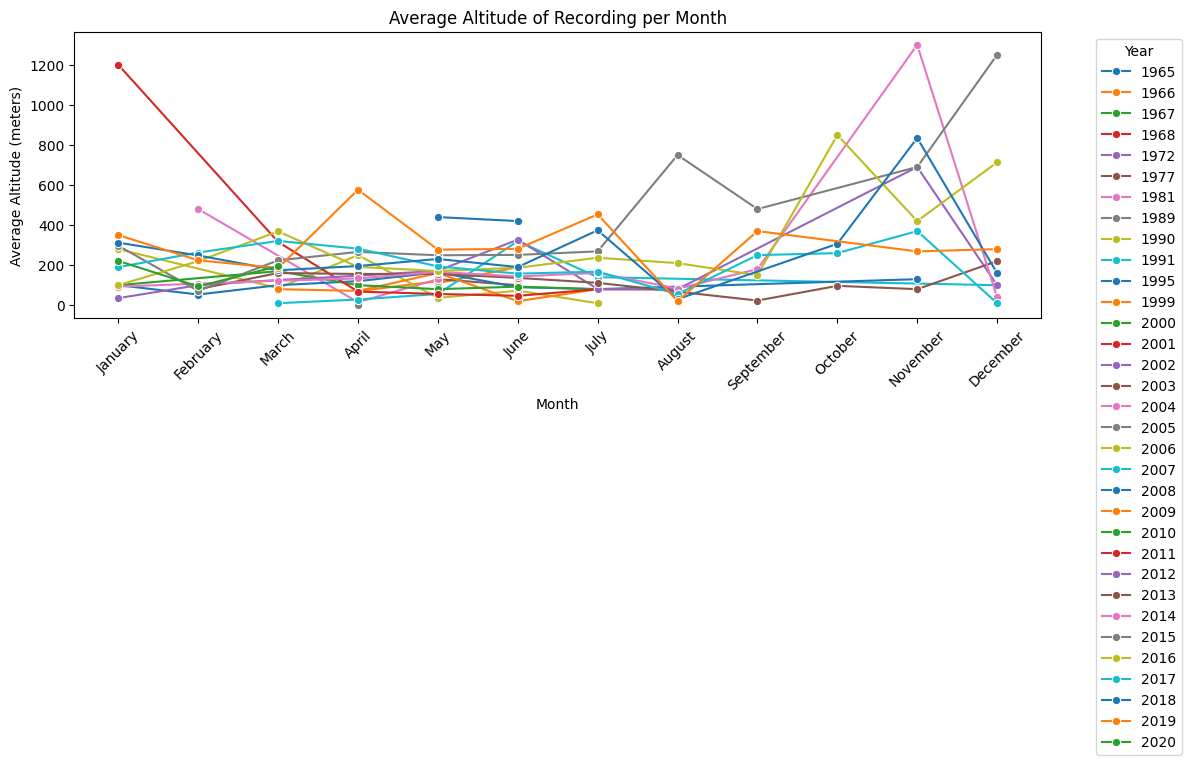

In [22]:
# Average altitude per month
monthly_avg_altitude = df.groupby(['Year', 'Month'])['Altitude'].mean().reset_index(name='Avg_Altitude')

plt.figure(figsize=(12, 6))
month_names = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
sns.lineplot(x='Month', y='Avg_Altitude', hue='Year', data=monthly_avg_altitude, marker='o', palette='tab10')

plt.title('Average Altitude of Recording per Month')
plt.xlabel('Month')
plt.ylabel('Average Altitude (meters)')
plt.xticks(ticks=range(1, 13), labels=month_names, rotation=45)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

C:\Users\Grzegorz\AppData\Local\Temp\ipykernel_29024\260668637.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




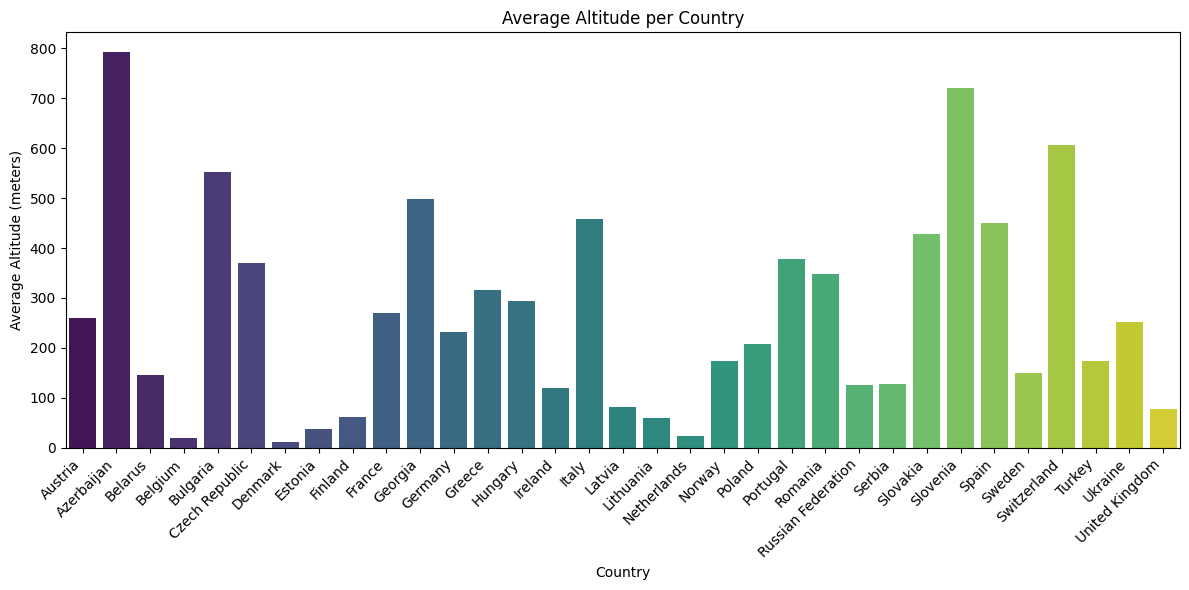

In [23]:
# Asverage altitude per country
avg_altitude_per_country = df.groupby('Country')['Altitude'].mean().reset_index(name='Avg_Altitude')


plt.figure(figsize=(12, 6))
sns.barplot(x='Country', y='Avg_Altitude', data=avg_altitude_per_country, palette='viridis')

plt.title('Average Altitude per Country')
plt.xlabel('Country')
plt.ylabel('Average Altitude (meters)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

C:\Users\Grzegorz\AppData\Local\Temp\ipykernel_29024\3658334729.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




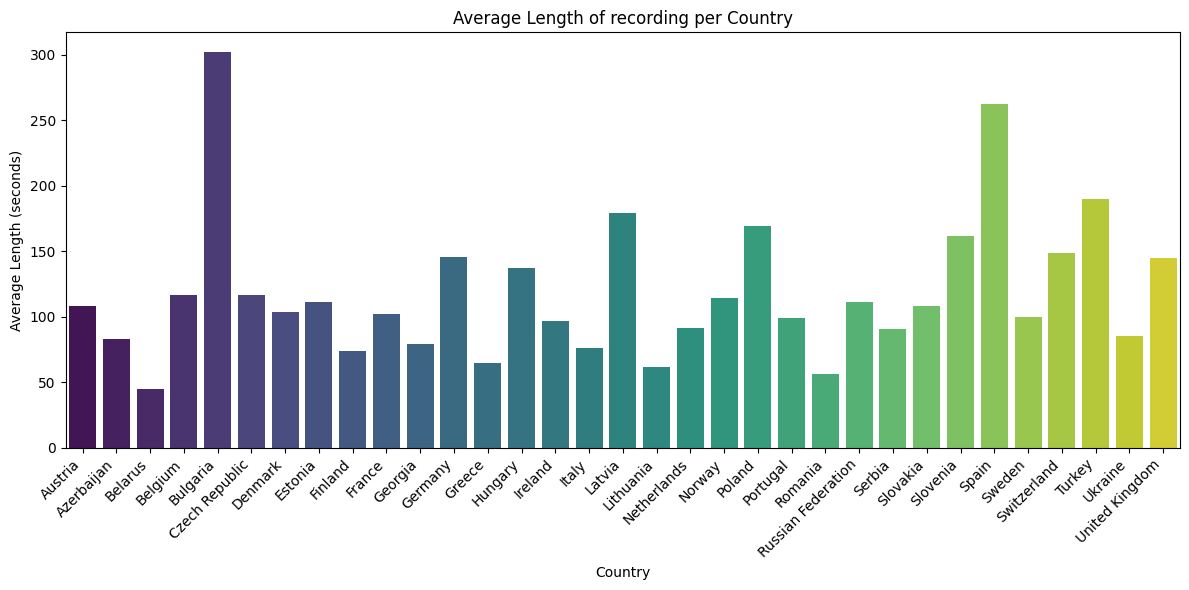

In [24]:
avg_altitude_per_country = df.groupby('Country')['Length_seconds'].mean().reset_index(name='Avg_Length')


plt.figure(figsize=(12, 6))
sns.barplot(x='Country', y='Avg_Length', data=avg_altitude_per_country, palette='viridis')

plt.title('Average Length of recording per Country')
plt.xlabel('Country')
plt.ylabel('Average Length (seconds)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

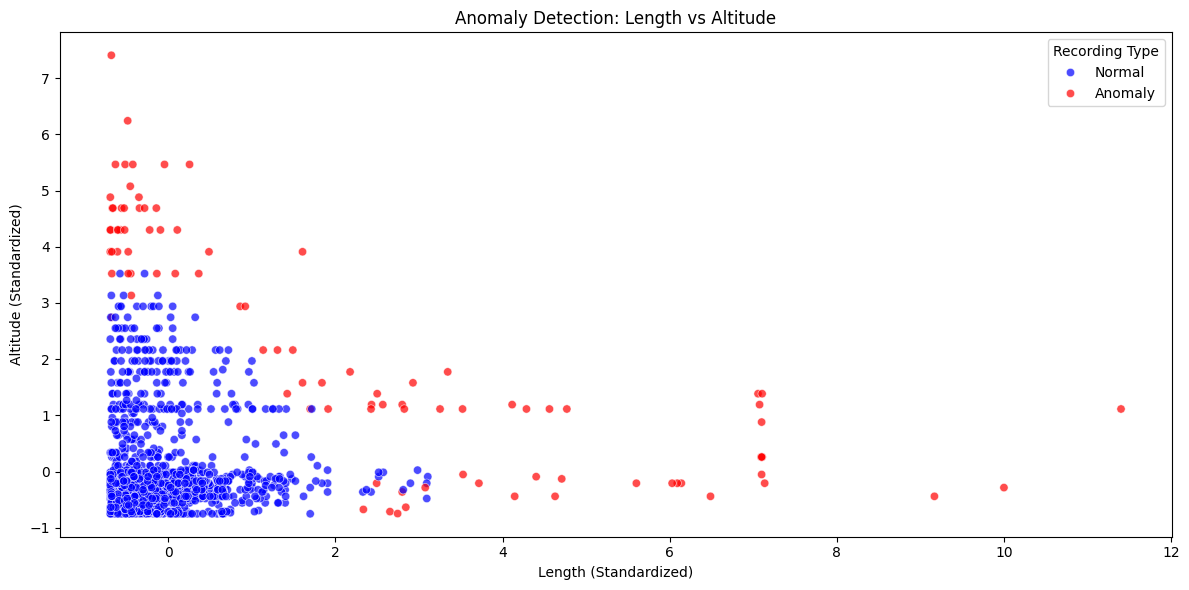

Number of anomalies detected: 95
Anomalies:
     Length_seconds  Altitude Quality          Species  Quality_numeric  \
3         7.057218  1.384805       B  Sonus naturalis        -0.959018   
8         7.093922  0.257870       B  Sonus naturalis        -0.959018   
10        7.106156  0.257870       B  Sonus naturalis        -0.959018   
15        7.106156  1.384805       B  Sonus naturalis        -0.959018   
18        7.100039  0.879627       B  Sonus naturalis        -0.959018   

    Species_encoded  Anomaly_Score  Anomaly  
3                41             -1  Anomaly  
8                41             -1  Anomaly  
10               41             -1  Anomaly  
15               41             -1  Anomaly  
18               41             -1  Anomaly  


In [25]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np


features = ['Length_seconds', 'Altitude', 'Quality', 'Species']
df_clean = df[features].dropna()  # Drop rows with missing data

# Encode 'Quality' into numeric values
quality_mapping = {'A': 3, 'B': 2, 'C': 1, 'no score': 0}
df_clean['Quality_numeric'] = df_clean['Quality'].map(quality_mapping)

label_encoder = LabelEncoder()
df_clean['Species_encoded'] = label_encoder.fit_transform(df_clean['Species'])


# Standardize numerical features for consistent scaling
scaler = StandardScaler()
df_clean[['Length_seconds', 'Altitude', 'Quality_numeric']] = scaler.fit_transform(
    df_clean[['Length_seconds', 'Altitude', 'Quality_numeric']]
)


anomaly_features = ['Length_seconds', 'Altitude', 'Quality_numeric']

# Train an Isolation Forest model
iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
df_clean['Anomaly_Score'] = iso_forest.fit_predict(df_clean[anomaly_features])

# Add anomaly label (1 for normal, -1 for anomaly)
df_clean['Anomaly'] = df_clean['Anomaly_Score'].apply(lambda x: 'Anomaly' if x == -1 else 'Normal')



# Visualize anomalies in Length vs Altitude
plt.figure(figsize=(12, 6))
sns.scatterplot(
    x='Length_seconds', 
    y='Altitude', 
    hue='Anomaly', 
    data=df_clean, 
    palette={'Normal': 'blue', 'Anomaly': 'red'}, 
    alpha=0.7
)
plt.title('Anomaly Detection: Length vs Altitude')
plt.xlabel('Length (Standardized)')
plt.ylabel('Altitude (Standardized)')
plt.legend(title='Recording Type')
plt.tight_layout()
plt.show()

# Filter and analyze the anomalies
anomalies = df_clean[df_clean['Anomaly'] == 'Anomaly']
print("Number of anomalies detected:", len(anomalies))
print("Anomalies:\n", anomalies.head())

